# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #FFD700; text-align: center; line-height: 0.55;background-color: #3B3B3C"><b>Financial Fraud Detection</b><br></h1>

<center>
    <img src="https://miro.medium.com/max/800/1*MZ0Qqk7xtHdvJJbUTu_1CQ.jpeg" alt="Credit Card Fraud Detection" width="50%">
</center>

### Problem Statement :

Credit Card Frauds are the cases of using someone else's credit cards for financial transactions without the information of the card owner. Credit Cards were made available inorder for the people to increase their buying power, it is an agreement with your bank that lets the user use the money lended by the bank in exchange for the repayment of this lended money on the due date or incur interest charges. With the rise in the e-commerce and the recent boom of OTT platforms during the Coronavirus Pandemic, use of credit cards has risen exponentially along with other payment processes. As all the things in the nature are binary, cases of credit card frauds has also achieved high numbers. Global economy pays the price of more than \\$ 24 billion per year due to these frauds. Thus, it becomes essential to solve this problem and as a result a lot of startups have been born into this \\$ 30 billion industry. Thus, building automated models for such a rising problem statement is necessary and AI - ML is the key for it!     

### Aim :
- To classify whether a credit card transaction is fradulent or genuine and handle unbalanced dataset.
- It is a **binary classification** problem with highly unbalanced data.

### <center>Dataset Attributes</center>
    
- **V1 - V28** : Numerical features that are a result of PCA transformation.

- **Time** : Seconds elapsed between each transaction and the 1st transaction.

- **Amount** : Transaction amount.

- **Class** : Fraud or otherwise (1 or 0)

### Notebook Contents :
- Dataset Information
- Data Visualization
- Feature Selection
- Data Balancing
- Modeling
- Conclusion

# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [284]:
data = pd.read_csv(r"C:\Users\satya\OneDrive\Desktop\solar_pred project\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### Data Info :

In [286]:
data.shape

(284807, 31)

In [287]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: >

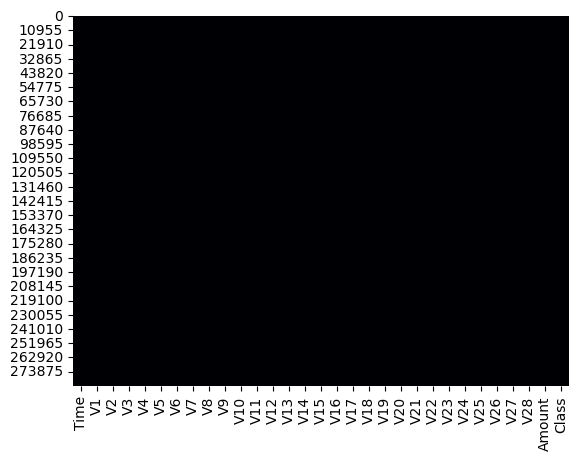

In [289]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

- **No null values** present in the data!

In [291]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


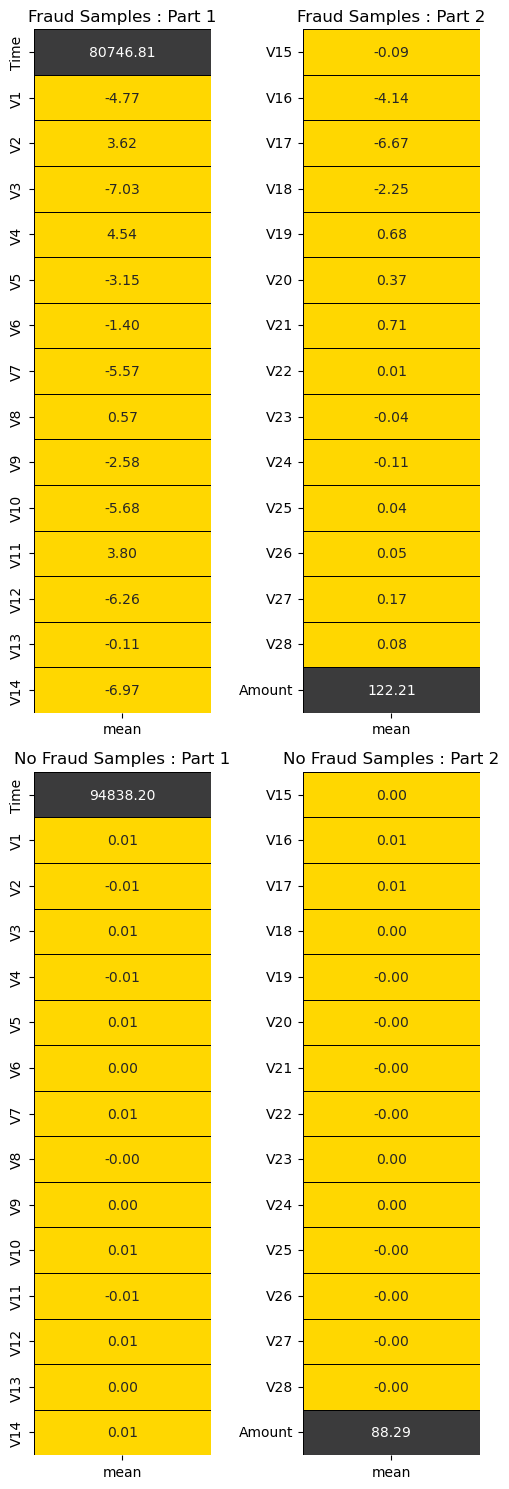

In [292]:
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (5,15))
plt.subplot(2,2,1)
sns.heatmap(fraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 1');

plt.subplot(2,2,2)
sns.heatmap(fraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Fraud Samples : Part 2');

plt.subplot(2,2,3)
sns.heatmap(nofraud[['mean']][:15],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 1');

plt.subplot(2,2,4)
sns.heatmap(nofraud[['mean']][15:30],annot = True,cmap = colors,linewidths = 0.5,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Fraud Samples : Part 2');

fig.tight_layout(w_pad = 2)

- **Mean** values of features for **Fraud** & **No Fraud** cases!
- For **No Fraud** cases, **V1 - V28** mean values are almost **0** for all the cases. Mean **Amount**, 88.29, is less than the mean transaction amount, 122.21, of the **Fraud** cases.
- **Time** taken for **No Fraud** transactions is more than those for **Fraud** transactions.
- These could be some of the indicators for detecting **fraud** transactions.

# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Data Visualization</div></center>

### Target Variable Visualization (Class) : 

C:\Users\satya\AppData\Local\Temp\ipykernel_9752\1237302720.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=data,                      # Create count plot for Class column
C:\Users\satya\AppData\Local\Temp\ipykernel_9752\1237302720.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Fraud', 'Fraud'])                     # Rename x-axis ticks


Text(0.5, 1.0, 'Number of Fraud Cases')

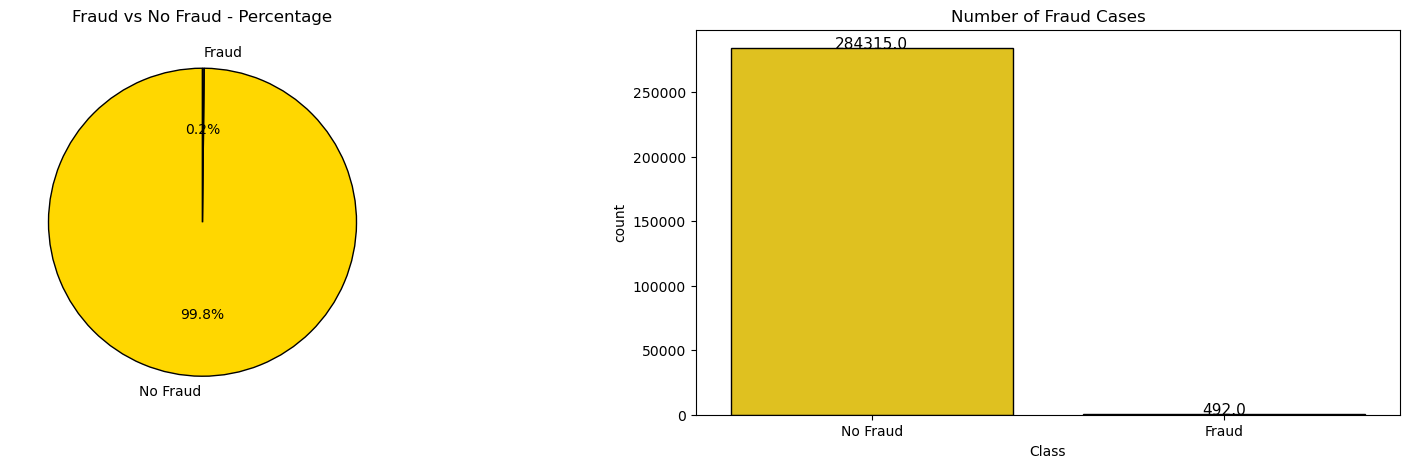

In [296]:
fraud = len(data[data['Class'] == 1]) / len(data) * 100        # Calculate percentage of fraud transactions
nofraud = len(data[data['Class'] == 0]) / len(data) * 100      # Calculate percentage of non-fraud transactions
fraud_percentage = [nofraud, fraud]                            # List to hold both percentages

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))      # Create a figure with 2 subplots side by side

# Pie chart
plt.subplot(1, 2, 1)                                           # Select the first subplot
plt.pie(fraud_percentage,                                      # Data for the pie chart
        labels=['No Fraud', 'Fraud'],                          # Labels for the slices
        autopct='%1.1f%%',                                     # Show percentage values
        startangle=90,                                         # Rotate start of pie chart
        colors=colors,                                         # Colors for slices
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})  # Slice styling
plt.title('Fraud vs No Fraud - Percentage')                    # Title for pie chart

# Count plot
plt.subplot(1, 2, 2)                                           # Select the second subplot
ax = sns.countplot(x='Class', data=data,                      # Create count plot for Class column
                   edgecolor='black', palette=colors)         # Style bars with edge color and palette
for rect in ax.patches:                                       # Loop through each bar
    ax.text(rect.get_x() + rect.get_width() / 2,              # X position for label
            rect.get_height() + 2,                            # Y position slightly above bar
            rect.get_height(),                                # Text showing the count
            horizontalalignment='center', fontsize=11)        # Center align text
ax.set_xticklabels(['No Fraud', 'Fraud'])                     # Rename x-axis ticks
plt.title('Number of Fraud Cases')                            # Title for bar plot


- The data is clearly **highly unbalanced** with majority of the transactions being **No Fraud**. 
- Due to highly unbalanced data, the classification model will bias its prediction towards the majority class, **No Fraud**. 
- Hence, data balancing becomes a crucial part in building a robust model. 

# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Feature Selection</div></center>

### Correlation Matrix :

<Axes: >

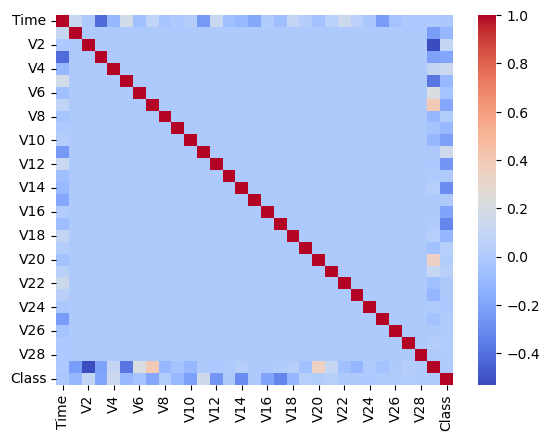

In [300]:
sns.heatmap(data.corr(), cmap="coolwarm", cbar=True)


- There are too many features in the dataset and it is difficult to understand anything. 
- Hence, we will plot the correlation map only with the target variable.

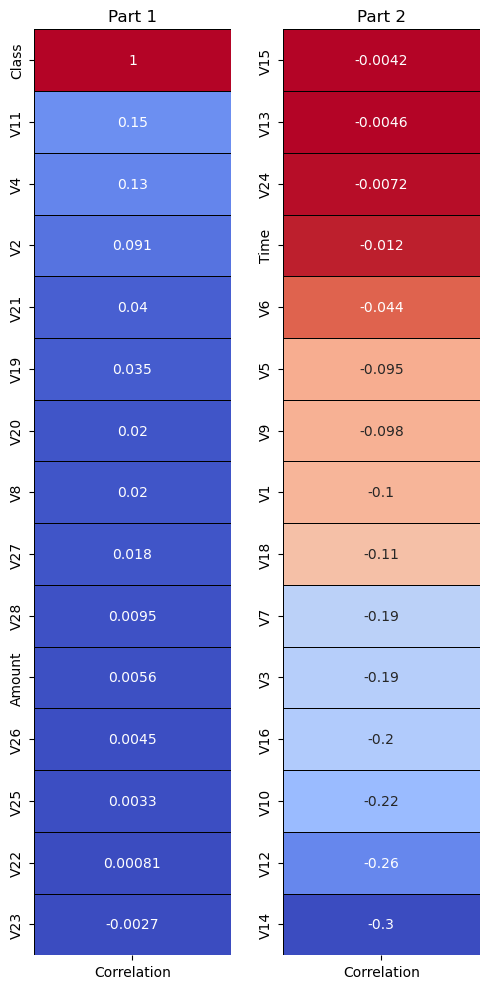

In [302]:
corr = data.corrwith(data['Class']).sort_values(ascending=False).to_frame()   # Compute correlation of all features with 'Class', sort, and convert to DataFrame
corr.columns = ['Correlation']                                                # Rename the column for clarity

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 10))                     # Create a figure with 2 vertical subplots

plt.subplot(1, 2, 1)                                                          # First subplot (left)
sns.heatmap(corr.iloc[:15, :],                                               # Plot top 15 correlated features
            annot=True, cmap="coolwarm", linewidths=0.4,                     # Show values, set colormap, add gridlines
            linecolor='black', cbar=False)                                   # Set line color and remove color bar
plt.title('Part 1')                                                          # Title for first heatmap

plt.subplot(1, 2, 2)                                                          # Second subplot (right)
sns.heatmap(corr.iloc[15:30],                                                # Plot next 15 correlated features
            annot=True, cmap="coolwarm", linewidths=0.4,                     # Same style as before
            linecolor='black', cbar=False)
plt.title('Part 2')                                                          # Title for second heatmap

fig.tight_layout(w_pad=2)                                                    # Adjust layout to prevent overlap


- For feature selection, we will **exclude** the features having correlation values between **[-0.1,0.1]**.
- V4, V11 are positively correlated and V7, V3, V16, V10, V12, V14, V17 are negatively correlated with the **Class** feature.

#### Dataset for Model based on Correlation Plot :

In [305]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.54,1.38,0.24,0.09,-0.55,-0.62,-0.31,-0.47,0.21,0
1,0.17,0.45,-0.08,-0.17,1.61,1.07,-0.14,0.46,-0.11,0
2,1.77,0.38,0.79,0.21,0.62,0.07,-0.17,-2.89,1.11,0
3,1.79,-0.86,0.24,-0.05,-0.23,0.18,-0.29,-1.06,-0.68,0
4,1.55,0.40,0.59,0.75,-0.82,0.54,-1.12,-0.45,-0.24,0


# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Data Balancing</div></center>

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
    
- For best performances, we will use the combination of undersampling and oversampling.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use **imblearn**.
- **PIP statement** : pip install imbalanced-learn

In [307]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#### Data Balancing for Model based on Correlation Plot :

In [309]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.iloc[:,:9].values
t1 = df1.iloc[:,9].values

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

C:\Users\satya\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Counter({0: 4920, 1: 2460})

# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Modeling</div></center>

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [312]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.20, random_state = 2)
#x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.20, random_state = 2)

- Splitting the data into **80 - 20 train - test** groups.

In [314]:
# Function to train the model, evaluate cross-validation & ROC AUC, and plot ROC curve
def model(classifier, x_train, y_train, x_test, y_test):
    
    classifier.fit(x_train, y_train)                                                   # Train the model on training data
    prediction = classifier.predict(x_test)                                            # Predict on test data
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)            # Define cross-validation strategy
    print("Cross Validation Score :", '{0:.2%}'.format(
        cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean())  # Print mean ROC AUC from CV
    )
    
    print("ROC_AUC Score :", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))      # Print ROC AUC score on test data
    
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)                         # Plot ROC curve
    plt.title('ROC_AUC_Plot')                                                          # Title for plot
    plt.show()                                                                         # Show the plot

# Function to evaluate the model: confusion matrix and classification report
def model_evaluation(classifier, x_test, y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))                          # Compute confusion matrix
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']                         # Labels for the cells
    counts = [value for value in cm.flatten()]                                         # Raw count values
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]       # Percentages of each cell
    
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]   # Combine label, count, and %
    labels = np.asarray(labels).reshape(2, 2)                                          # Reshape to 2x2 for heatmap
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='')                                # Plot confusion matrix as heatmap
    
    # Classification Report
    print(classification_report(y_test, classifier.predict(x_test)))                   # Print precision, recall, f1-score, etc.


### 1] Logistic Regression :

In [316]:
from sklearn.linear_model import LogisticRegression

In [317]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

#### Model based on Correlation Plot :

Cross Validation Score : 97.96%
ROC_AUC Score : 93.59%


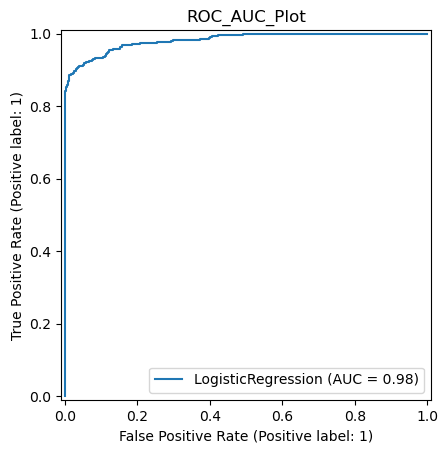

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       975
           1       0.97      0.89      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.94      1476
weighted avg       0.95      0.95      0.95      1476



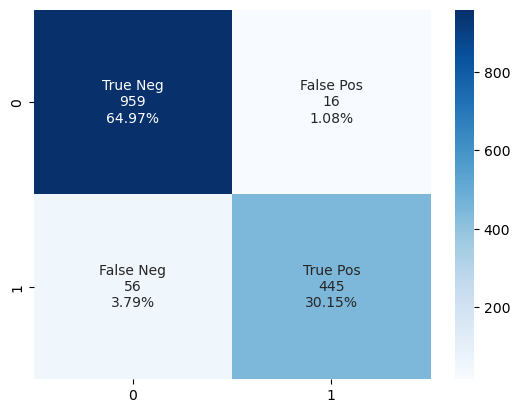

In [319]:
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

### 2] Support Vector Classifier :

In [321]:
from sklearn.svm import SVC

In [322]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

#### Model based on Correlation Plot :

Cross Validation Score : 97.82%
ROC_AUC Score : 93.15%


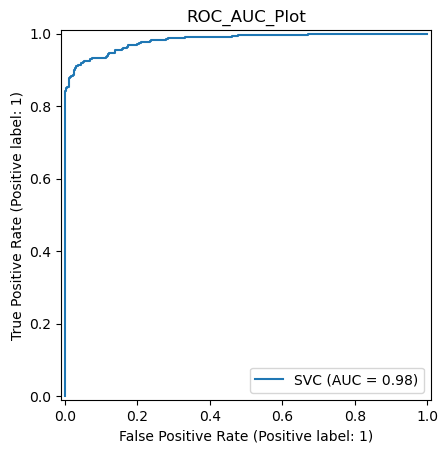

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.98      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



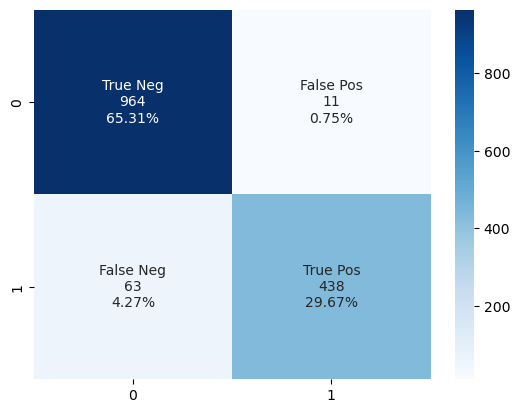

In [324]:
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

### 3] Decision Tree Classifier :

In [326]:
from sklearn.tree import DecisionTreeClassifier

In [327]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

#### Model based on Correlation Plot :

Cross Validation Score : 96.49%
ROC_AUC Score : 94.38%


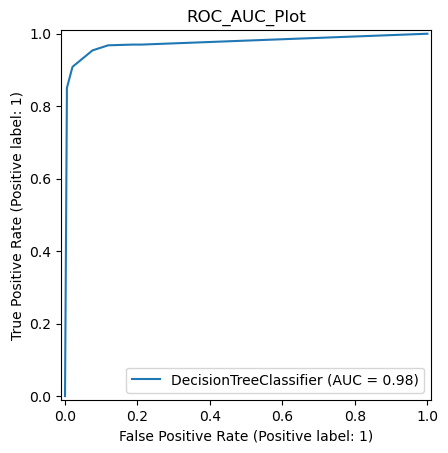

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       975
           1       0.96      0.91      0.93       501

    accuracy                           0.96      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.96      0.96      0.95      1476



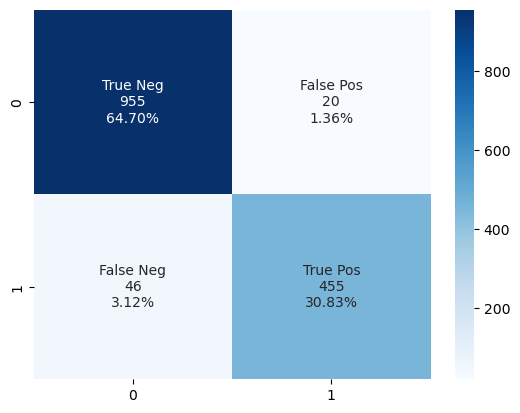

In [329]:
model(classifier_dt,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_dt,x_test1,y_test1)

### 4] Random Forest Classifier : 

In [331]:
from sklearn.ensemble import RandomForestClassifier

In [332]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

#### Model based on Correlation Plot :

Cross Validation Score : 97.83%
ROC_AUC Score : 93.21%


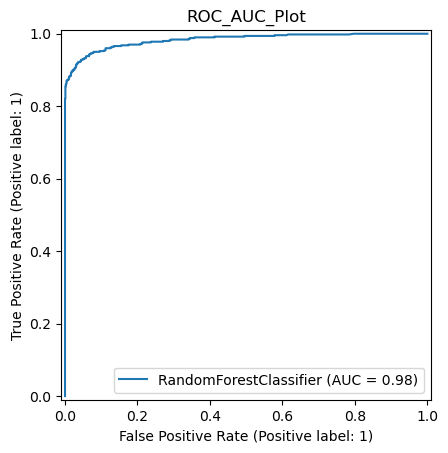

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.99      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



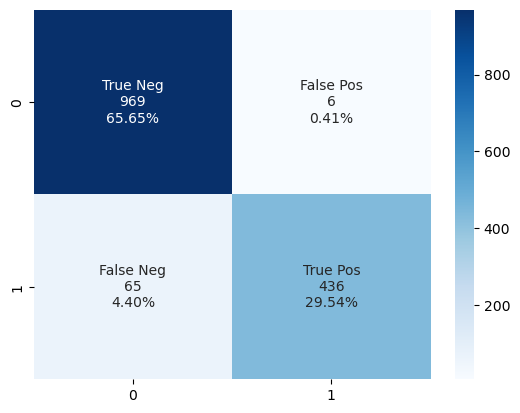

In [334]:
model(classifier_rf,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_rf,x_test1,y_test1)

### 5] K-Nearest Neighbors :

In [336]:
from sklearn.neighbors import KNeighborsClassifier

In [337]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

#### Model based on Correlation Plot :

Cross Validation Score : 99.30%
ROC_AUC Score : 98.68%


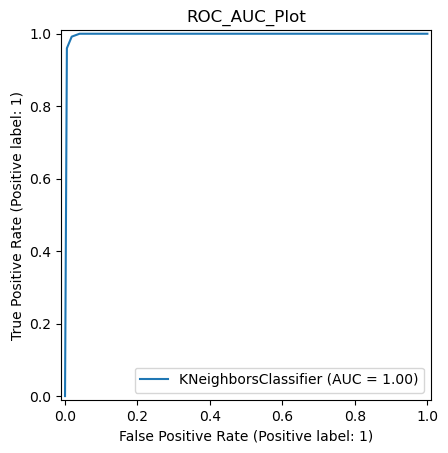

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       975
           1       0.97      0.99      0.98       501

    accuracy                           0.99      1476
   macro avg       0.98      0.99      0.98      1476
weighted avg       0.99      0.99      0.99      1476



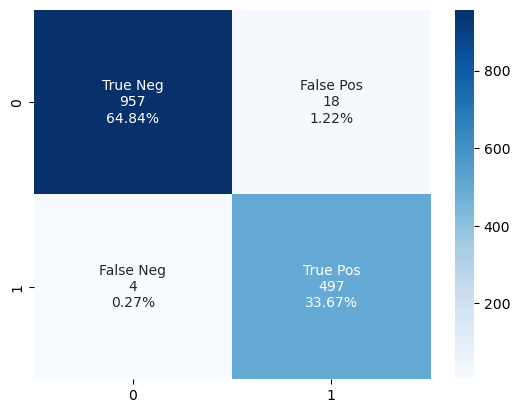

In [339]:
model(classifier_knn,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_knn,x_test1,y_test1)

### ML Alogrithm Results Table :

#### Results Table for models based on Correlation Plot : 

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Fraud)|
|-|-|-|-|-|
|1|Logistic Regression|98.01%|92.35%|91%|
|2|Support Vector Classifier|97.94%|92.10%|91%|
|3|Decision Tree Classifier|96.67%|91.36%|90%|
|4|Random Forest Classifier|97.84%|91.71%|91%|
|5|K-Nearest Neighbors|99.34%|97.63%|97%|


# <center><div style="font-family: Trebuchet MS; background-color: #3B3B3C; color: #FFD700; padding: 12px; line-height: 1;">Conclusion</div></center>

- This is a great dataset to learn about binary classification problem with unbalanced data.


- As the features are disguised, feature selection cannot be assisted based on the domain knowledge of the topic. Statistical tests hold the complete importance to select features for modeling.  


- Due to the use of SMOTE analysis for balancing the data, the models trained on this synthetic data cannot be evaluated using accuracy. Hence, we resort to Cross Validation Score and ROC-AUC Score for model evaluation.